In [34]:
using Plots, CSV, DataFrames, LsqFit


In [45]:
using CSV
using DataFrames
using Plots
using LsqFit

# Funktion zum Plotten der Daten zusammen mit Fit
"""
# Die Funktion plottet Druck p gegen die Anzahl der Counts. Zusätzlich plottet sie einen geeigneten Fit
# Arguments
- `path_to_csv`: Der Pfad zur csv datei. Beginnt mit ../data/ 
- `init_c_param`: Anfangsparameter für den Fit. Gibt an, an bei welchem Druck die Hälfte der maximalen Counts erreicht ist
- `d`: Gemessener Abstand 
- `init_a_param`: Anfangsparameter für den Fit. Maximalwert der Counts
- `init_b_param`: Anfangsparameter für den Fit. Gibt Steiheit der Kurve an
"""
function plot_p_counts(path_to_csv::String, init_c_param, d; time=60, init_a_param=60.0, init_b_param=0.5)
    # Daten einlesen
    data = CSV.read(path_to_csv, DataFrame)
    p_s = data[:, 1]            # Druck in mbar
    Delta_p_s = data[:,2]       # Fehler der Drücke
    counts = data[:, 3]
    counts_per_second = counts ./ time

    N = sum(counts)
    Delta_counts_per_second = sqrt(N)/time

    # Fit-Funktion definieren (z. B. eine exponentielle Funktion)
    fit_model(x, p) = p[1] ./ (1 .+ exp.(-p[2] .* (x .- p[3])))

    # Fit durchführen
    initial_params = [60.0, 0.5, init_c_param]  # Anfangsschätzungen für die Parameter
    fit_result = curve_fit(fit_model, p_s, counts_per_second, initial_params)
    @show fit_params = fit_result.param

    # Fit-Werte berechnen
    p_fit = range(minimum(p_s), maximum(p_s), length=100)  # Glatter Bereich für die Fit-Kurve
    fit_curve = fit_model(p_fit, fit_params)

    # Plot erstellen
    fig = plot(
        p_s,
        counts_per_second,
        xlabel="Druck in mbar",
        ylabel="counts pro Sekunde",
        title="Counts pro Sekunde gegen Druck",
        seriestype="scatter",
        label="Messwerte",
        xerror=Delta_p_s,
        yerror=Delta_counts_per_second
    )

    # Fit-Kurve hinzufügen
    plot!(
        p_fit,
        fit_curve,
        label="Fit-Kurve",
        linewidth=2,
        color=:red
    )

    return fig
end





function plot_p_U(path_to_csv)
    data = CSV.read(path_to_csv, DataFrame)
    p_s = data[:,1]
    U = data[:,4]

    plot(
        p_s,
        U,
        seriestype="scatter"
    )
end


plot_p_U (generic function with 1 method)

# Luft Ohne Folie <br>

## d1 = 34

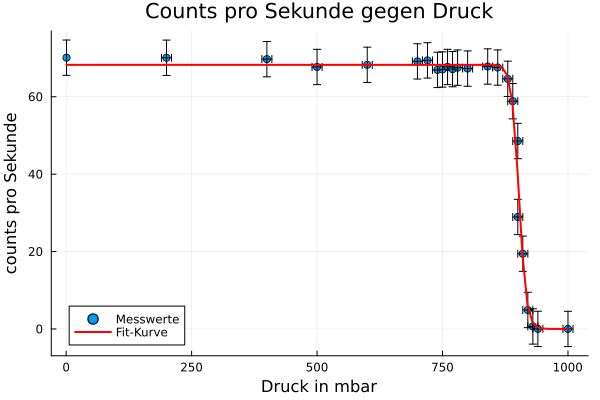

fit_params = fit_result.param = [68.24216236633524, -0.13604020517683876, 902.350290004747]


In [51]:
d_1 = 34      #Gewählter Abstand

### Plotte Messergebnisse
p1 = plot_p_counts("../data/luft_ohne_folie/d1.csv", 750.0, d_1)
savefig(p1, "../plots/OF_d34.png")

display(p1)

## d2  = 35


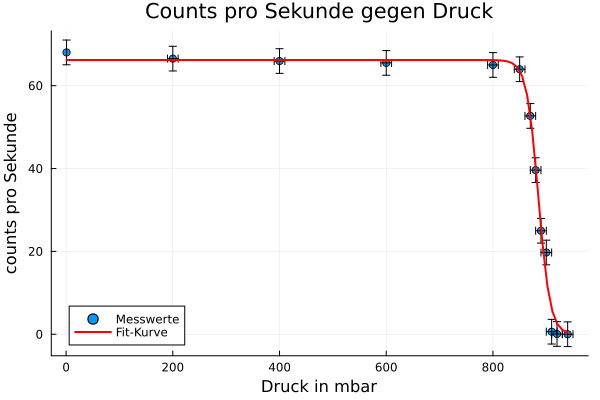

fit_params = fit_result.param = [66.19829581088442, -0.09123464893799905, 885.0755989683912]


In [52]:
d_2 = 35     #Gewählter Abstand

### Plotte Messergebnisse
p2 = plot_p_counts("../data/luft_ohne_folie/d2.csv", 850.0, d_2)

savefig(p2, "../plots/OF_d34.png")

display(p2)

## d3 = 36

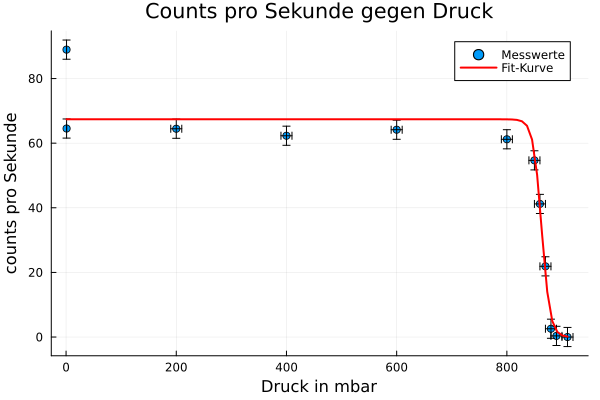

fit_params = fit_result.param = [67.39279451251656, -0.13119066620890743, 863.0675032024596]


In [53]:
d_3 = 36      #Gewählter Abstand

### Plotte Messergebnisse
p3 = plot_p_counts("../data/luft_ohne_folie/d3.csv", 850, d_3)

savefig(p3, "../plots/OF_d34.png")

display(p3)

## d4 = 37

fit_params = fit_result.param = [59.19621280479715, -0.2855153152419249, 841.9051968794215]


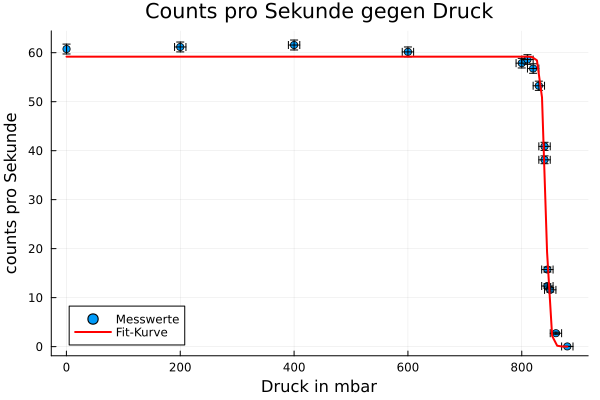

In [39]:
d_4 = 37      #Gewählter Abstand

### Plotte Messergebnisse
plot_p_counts("../data/luft_ohne_folie/d4.csv", 850, d_4)

# Mit Folie

## Probe 1 Gold d = 23

fit_params = fit_result.param = [125.7363926436414, -0.043992771114813777, 839.6280595222837]


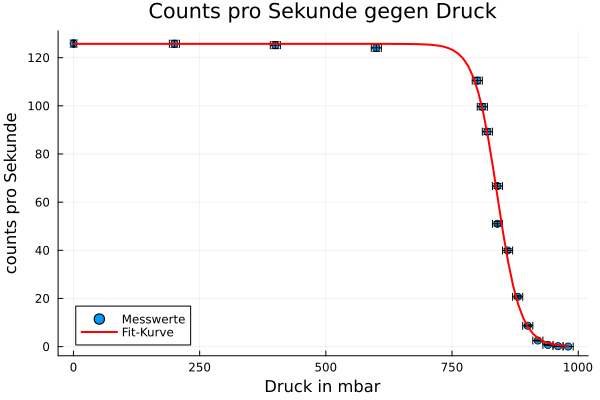

In [40]:
d_G = 23      #Gewählter Abstand

### Plotte Messergebnisse
plot_p_counts("../data/luft_mit_folie/erste_probe.csv", 850,d_G)

## Probe 2, Alu 16mm

fit_params = fit_result.param = [205.31729596809348, -0.022681567923527015, 686.9647503535704]


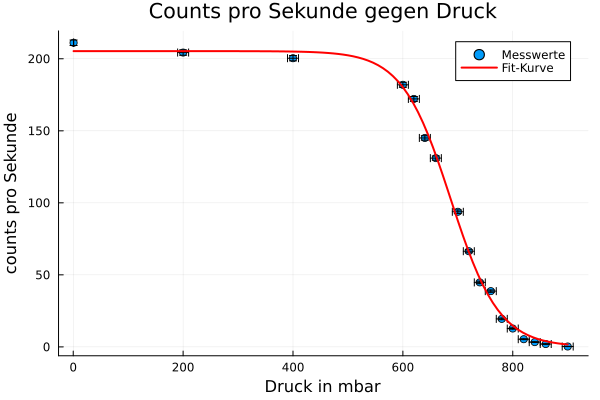

In [41]:
d_A = 16

plot_p_counts("../data/luft_mit_folie/zweite_probe.csv",630,init_a_param=200, init_b_param = 0.1 ,d_A)
